In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
#Upperbound para os pontos
N = 150
#Número de hospitais
H = 5
#Número de veículos
K = 15
#Número de Ocorrências
O = 5

In [12]:
#Cria uma matriz de coordenadas (x,y) aleatórias
coord = pd.DataFrame(np.random.rand(N,2),index=range(N),columns=["x","y"])
#Verifica se existem dois pontos iguais
if max(coord.value_counts()) > 1:
    count = 0
    for i in coord.value_counts():
        if i>1:
            #e então remove todos os que se aplicarem
            coord.drop(count)
        count+=1
    #por fim reindexando a matriz
    coord.index=pd.RangeIndex(0,len(coord))

In [13]:
#Cria as colunas com os arcos do vértice
coord[1] = coord[2] = coord[3] = coord[4] =-1

In [14]:
#Matriz de distância entre os pontos
_DistanceMatrix = pd.DataFrame(0.0,index=range(len(coord)),columns=range(len(coord)))

In [15]:
#Matriz dos arcos entre os pontos
_ConnectionMatrix = pd.DataFrame(False,index=range(len(coord)),columns=range(len(coord)))

In [16]:
#Popula a matriz de distância com
#a distância euclidiana
for i in _DistanceMatrix.index:
    for j in _DistanceMatrix.index:
        dx = (coord.loc[i]["x"]-coord.loc[j]["x"])**2
        dy = (coord.loc[i]["y"]-coord.loc[j]["y"])**2
        _DistanceMatrix.loc[i][j] = (dx+dy)**1/2

In [17]:
#Lista de todos os nodos com arcos completos
completed = []
for i in _ConnectionMatrix.index:
    #Contabiliza o número de conexões já feitas no nodo atual
    n_con = sum(_ConnectionMatrix.loc[i])
    #Se ainda faltar alguma conexão livre
    if n_con < 4:
        #Procura todos os nodos que ainda não foram completados
        incomplete = ~_ConnectionMatrix.index.isin(completed)
        
        #E todos os nodos que ainda não foram preenchidos em 'i'
        free = ~_ConnectionMatrix.loc[i].values
        
        #Ordena em ordem crescente todas as distâncias que satisfazem
        #as duas condições e pega os melhores arcos para completar 'i'
        sort = sorted(_DistanceMatrix.loc[i][incomplete & free])[1:1+(4-n_con)]
        
        #Separa quais os índices dos pontos de chegada determinados
        #na ordenação anterior
        bol = _DistanceMatrix.loc[i].isin(sort)
        
        string = str(i)+": "+str(_ConnectionMatrix.index[~free].values)+" -> "
        #Percorre esses indices
        for j in _DistanceMatrix.loc[i][bol].index:
        
            #Cria o arco 'i_j'
            _ConnectionMatrix.at[i,j] = True
            
            #Cria o arco 'j_i'
            _ConnectionMatrix.at[j,i] = True
            
            #Se 'j' completar adicionar 'j' na lista de nodos completos
            if sum(_ConnectionMatrix.loc[j]) == 4:
                completed.append(j)
        #Se 'i' completar adicionar 'i' na lista de nodos completos
        if sum(_ConnectionMatrix.loc[i]) == 4:
            completed.append(i)
        free = ~_ConnectionMatrix.loc[i].values
        string+= str(_ConnectionMatrix.index[~free].values)
        print(string)

0: [] -> [43 77 80 94]
1: [] -> [ 22  57  58 139]
2: [] -> [ 11  29  34 129]
3: [] -> [ 54  56  76 112]
4: [] -> [ 13  28  68 123]
5: [] -> [  8  80  94 128]
6: [] -> [ 10  52 136 149]
7: [] -> [107 111 119 130]
8: [5] -> [  5  80  94 128]
9: [] -> [ 57  73  99 138]
10: [6] -> [  6  52  71 136]
11: [2] -> [  2  29  75 129]
12: [] -> [ 42  64 102 104]
13: [4] -> [  4  28  68 123]
14: [] -> [18 61 65 85]
15: [] -> [ 50 109 114 122]
16: [] -> [ 42  98 104 139]
17: [] -> [ 38 113 122 140]
18: [14] -> [14 23 61 65]
19: [] -> [ 37  52  70 149]
20: [] -> [ 35  89 118 136]
21: [] -> [ 48  86 116 146]
22: [1] -> [  1  57  58 139]
23: [18] -> [ 18  65 115 134]
24: [] -> [116 127 135 136]
25: [] -> [ 27  85  99 102]
26: [] -> [ 44  76 117 147]
27: [25] -> [ 25  85  99 138]
28: [ 4 13] -> [  4  13  66 105]
29: [ 2 11] -> [  2  11  34 129]
30: [] -> [ 41  71  83 137]
31: [] -> [ 45  82 125 145]
32: [] -> [ 67  91 108 133]
33: [] -> [ 35  36 106 121]
34: [ 2 29] -> [  2  29  46 129]
35: [20 33] -> [

In [19]:
#Verifica se a instância é válida
for i in _ConnectionMatrix.index:
    if sum(_ConnectionMatrix.loc[i]) != 4:
        print(i)
        print(sum(_ConnectionMatrix.loc[i]))

In [20]:
#Preenche os arcos para cada ponto
for i in _ConnectionMatrix.index:
    #Pega todos os nodos em que existe um arco saindo de 'i'
    index = _ConnectionMatrix.index[_ConnectionMatrix.loc[i]]
    count=0
    
    for j in coord.columns[2:]:      #Itera sobre as conexões de 'i'
        coord.at[i,j] = index[count] #Adiciona 'ij' aos arcos de 'i'
        count+=1

In [21]:
sinal = 0 #Tempo entre as alterações de estado de um sinal
for i in coord.index:
    for j in coord.loc[i][2:]:
        #Somamos o tempo de cada arco
        sinal+=_DistanceMatrix.loc[i][j]
sinal = (sinal/(3*len(coord))) #O tempo de alteração vai ser a média

In [22]:
#Matriz de estado dos arcos entre os sinais
SignalState = pd.DataFrame(False,index = coord.index, columns= coord.columns[2:],dtype=bool)

for i in coord.index:
    for n in coord.loc[i][2:]:
        j = int(n)
        #Se o tempo de percorrer o arco 'ij' é menor que o tempo
        #de alteração dos sinais SignalState = True, False caso contrário
        SignalState.loc[i][n] = (_DistanceMatrix.loc[i][j] < sinal)

In [23]:
#Matriz de Estado Instântaneo, representa o estado dos sinais no momento 0
SignalInstantState = pd.DataFrame(False,index = coord.index, columns=["state"], dtype=bool)
SignalInstantState.loc[0]=True

#Nodos já visitados pela busca por profundidade
visited = set()
#Nodo inicial
actual_node = 0

#Busca por profundidade, para encontrar ciclo principal
def dfs(visited,actual_node):
    visited.add(actual_node)
    not_visited = coord.loc[actual_node][2:][~coord.loc[actual_node][2:].isin(visited)]
    if len(not_visited)>0:
        for i in not_visited:
            #Pega a coluna que representa o nodo de índice 'i'
            column = coord.loc[actual_node][coord.loc[actual_node] == int(i)].index[0]
            #Realiza um XOR
            xor = SignalState.loc[actual_node][column] != SignalInstantState.loc[actual_node]["state"]
            #Prevê o estado do nodo 'i' no instante 0
            SignalInstantState.loc[int(i)]["state"] = xor
            #Adiciona o nodo 'i'
            visited = dfs(visited,i)
        return visited
            
    else:
        return visited
#Lista dos nodos no ciclo principal
l = dfs(visited,0)

In [24]:
#Todos os índices de ciclos externos
aux = coord.index[~coord.index.isin(l)]
for i in aux:
    #Eliminação de ciclos externos
    coord.drop(i,inplace=True)
len(coord)

150

In [25]:
#Eliminação dos Índices de ciclos externos
SignalInstantState.drop(SignalInstantState.loc[~SignalInstantState.index.isin(coord.index)].index,inplace=True)
SignalState.drop(SignalState.loc[~SignalState.index.isin(coord.index)].index,inplace=True)

In [26]:
#Reindexação Geral
for i in range(len(coord)):
    for j in range(len(coord)):
        for k in coord.loc[coord.index[j]][2:].index:
            if coord.loc[coord.index[j]][k] == coord.index[i]:
                coord.loc[coord.index[j],k] = i
coord.index = pd.RangeIndex(len(coord))
SignalInstantState.index = pd.RangeIndex(len(coord))
SignalState.index = pd.RangeIndex(len(coord))

In [27]:
#Pontos escolhidos como hospitais
hospitais = pd.DataFrame(coord.index[np.random.randint(0,len(coord),H)],columns=["P"])

In [28]:
#Instância dos Veículos
veiculos = pd.DataFrame(index=range(K),columns=["Inicial","LowerBound","UpperBound"])

for i in veiculos.index:
    #Ponto inicial do veículo, escolhido aleatoriamente
    inicial = hospitais.loc[np.random.randint(0,len(hospitais))]["P"]
    #Quantidade do mesmo tipo de veículo no mesmo hospital
    qntd = np.random.randint(1,5)
    #Para cada veículo do mesmo tipo
    for j in range(qntd):
        lb = np.random.randint(0,6)      #Temos a prioridade mínima pela qual ele atende
        ub = np.random.randint(5,11)     #e a prioridade máxima que ele consegue atender
        veiculos.loc[i+j] = [inicial,lb,ub] #Inserção do veículo na instância

In [29]:
#Ocorrências
ocurrences = pd.DataFrame(index=range(O),columns=["P"])
#Pontos que não estejam previamente ocupados por hospitais
aux = coord[~coord.index.isin(hospitais["P"].values)].index
for i in range(O):
    #Escolhe aleatoriamente dentro dos pontos livres
    ocurrences.loc[i]["P"] = aux[np.random.randint(0,len(aux))]
    

In [30]:
#Instância das vítimas
victims = pd.DataFrame(index=range(O),columns=["Ponto","Prioridade"])
for i in range(O):
    #Escolhe dentro dos pontos das ocorrências 
    victims.loc[i] = [ocurrences.loc[i]["P"],np.random.randint(0,11)]

In [31]:
#Salva as instâncias
veiculos.to_csv("k_"+str(K))
victims.to_csv("v_"+str(O))
coord.to_csv("n_"+str(len(coord)))
SignalInstantState.to_csv("si_"+str(len(SignalInstantState)))
SignalState.to_csv("s_"+str(len(SignalInstantState)))

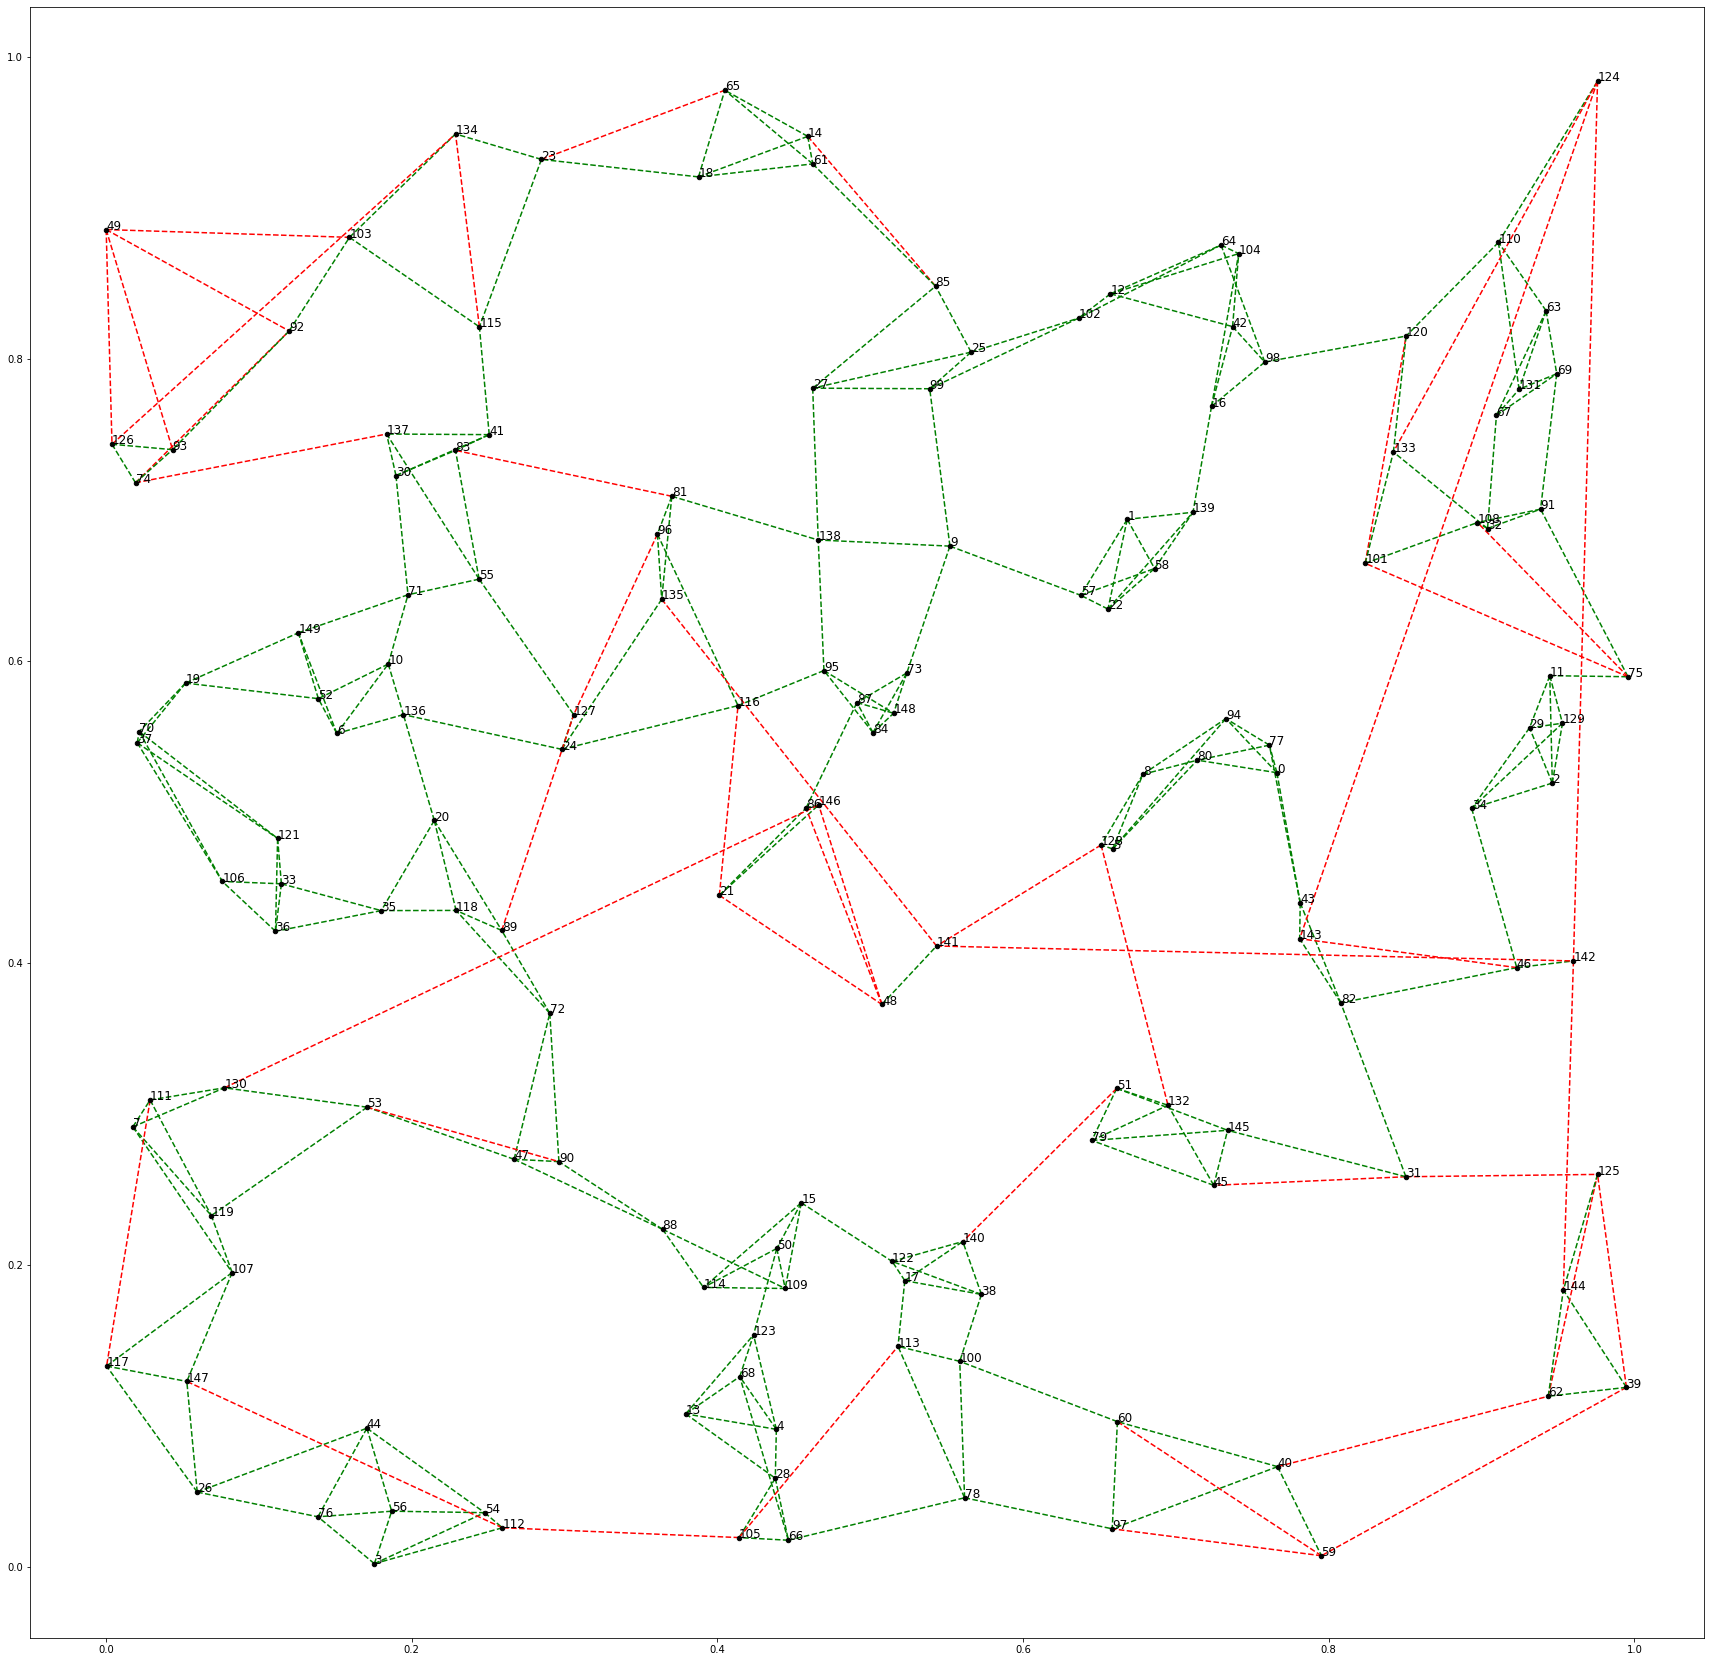

In [32]:
#Gera uma imagem do sistema criado
plt.figure(figsize=(30,30))
for i in coord.index:
    plt.scatter(coord.loc[i]["x"],coord.loc[i]["y"],s=20,color='black',zorder=1)
    plt.text(coord.loc[i]["x"],coord.loc[i]["y"],str(i),fontsize=12)

visitados = {x:[] for x in coord.index}
for i in coord.index:
    l = [int(x) for x in coord.loc[i][2:]]
    xcoord = list(coord.loc[l]['x'].values)
    
    ycoord = list(coord.loc[l]['y'].values)
    
    for j in range(len(xcoord)):
        if l[j] not in visitados[i]:
            if _DistanceMatrix.loc[i][l[j]] < sinal:
                plt.plot([coord.loc[i]["x"],xcoord[j]],[coord.loc[i]["y"],ycoord[j]],'g--',zorder=0)
            else:
                plt.plot([coord.loc[i]["x"],xcoord[j]],[coord.loc[i]["y"],ycoord[j]],"r--",zorder=0)
        visitados[l[j]].append(i)

plt.savefig("n"+str(len(coord)))